3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:
1. Data Exploration and Understanding:
• Dataset Overview:

1. Load the dataset and display the first 10 rows.

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Assignment 1/WHR-2024-5CS037.csv')
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


2. Identify the number of rows and columns in the dataset.

In [168]:
print("\nNumber of rows and columns:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Number of rows and columns:
Rows: 143, Columns: 9


3. List all the columns and their data types.

In [169]:
print("\nColumns and their data types:")
print(df.dtypes)


Columns and their data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


• Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.

In [170]:
print("The mean is: ",df['score'].mean())
print("The median is: ",df['score'].median())
print("The standard deviation is: ", df['score'].std())

The mean is:  5.52758041958042
The median is:  5.785
The standard deviation is:  1.1707165099442995


2. Identify the country with the highest and lowest happiness scores.

In [171]:
df[df['score'] == df['score'].max()]['Country name']
df[df['score'] == df['score'].min()]['Country name']

,Country name
142,Afghanistan


• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [172]:
df.isnull().sum()

,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


• Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [173]:
df[df['score'] > 7.5]['Country name']

,Country name
0,Finland
1,Denmark
2,Iceland


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [174]:
sorted_df = df.sort_values(by='Log GDP per capita', ascending=False)
country_names = sorted_df[['Country name', 'Log GDP per capita']].head(10)
country_names

,Country name,Log GDP per capita
7,Luxembourg,2.141
16,Ireland,2.129
29,Singapore,2.118
21,United Arab Emirates,1.983
8,Switzerland,1.970
6,Norway,1.952
22,United States,1.939
85,Hong Kong S.A.R. of China,1.909
1,Denmark,1.908
5,Netherlands,1.901


• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [175]:
df['Happiness Category'] = pd.cut(df['score'], bins = [-float('inf'),4,6,float('inf')],labels=['Low','Medium','High'])
df['Happiness Category']

,Happiness Category
0,High
1,High
2,High
3,High
4,High
...,...
138,Low
139,Low
140,Low
141,Low


2. Data Visualizations:
• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

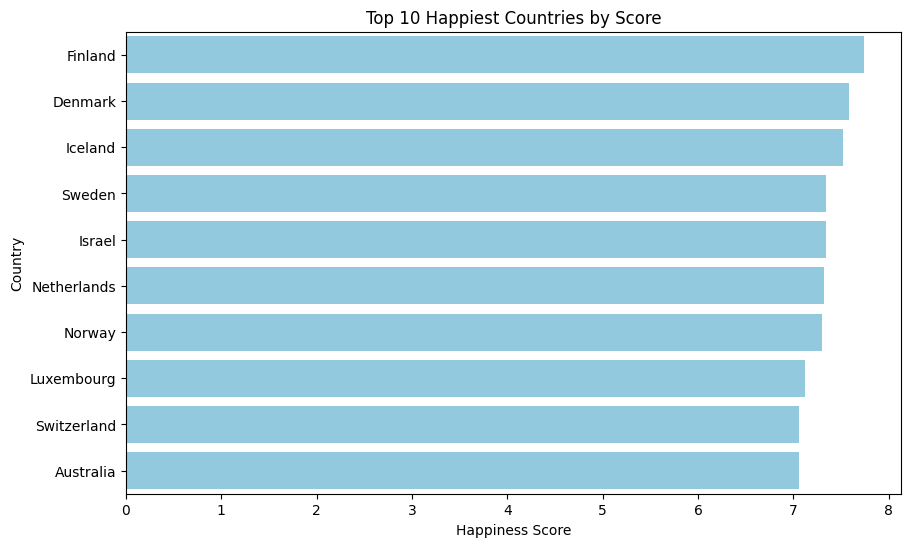

In [176]:
top_10_happiest = df.sort_values(by='score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest, color='skyblue')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

<Axes: xlabel='Country name'>

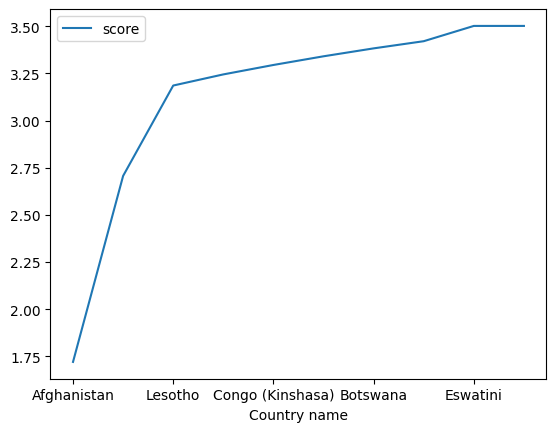

In [177]:
top_10_countries = df[['score','Country name']].sort_values(by='score',ascending=True).head(10)
top_10_countries.plot(kind='line',x='Country name',y='score')

• Plot a histogram for the Score column to show its distribution and also interpret.

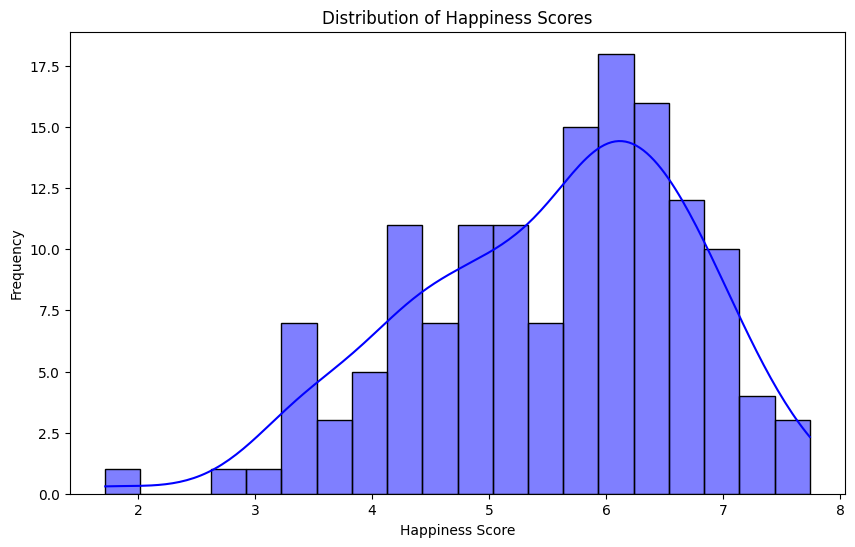

In [178]:
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

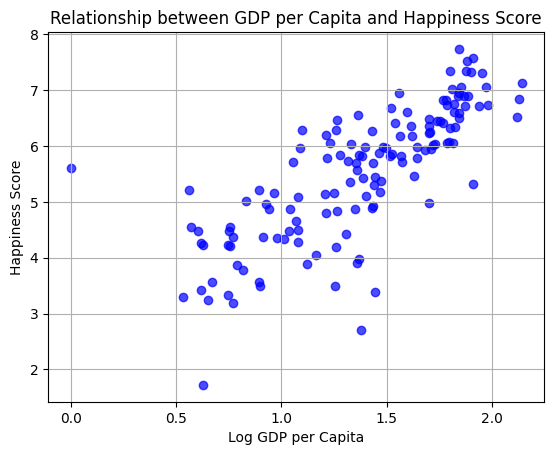

In [179]:
plt.scatter(df['Log GDP per capita'], df['score'], color='blue', alpha=0.7)
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

3.2 Problem - 2 - Some Advance Data Exploration Task:
Task - 1 - Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]

In [180]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Step 2: Filter the dataset to include only South Asian countries
south_asian_df = df[df['Country name'].isin(south_asian_countries)]

# Step 3: Save the filtered dataframe as a separate CSV file
south_asian_df.to_csv('/content/drive/MyDrive/Assignment 1/asian_country.csv', index=False)

# Displaying the first 5 rows of the filtered data for verification
print(south_asian_df.head())

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   

     Perceptions of corruption  Dystopia + residual Happiness Category  
92                       0.115                1.783             Medium  
107                      0.074

Task - 2 - Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy

In [181]:
south_asian_df = pd.read_csv('/content/drive/MyDrive/Assignment 1/asian_country.csv')
south_asian_df['Composite Score'] = (
    0.40 * south_asian_df['Log GDP per capita'] +
    0.30 * south_asian_df['Social support'] +
    0.30 * south_asian_df['Healthy life expectancy']
)
south_asian_df[['Country name', 'Composite Score']]



,Country name,Composite Score
0,Nepal,0.8159
1,Pakistan,0.7039
2,India,0.7874
3,Sri Lanka,1.0739
4,Bangladesh,0.6774
5,Afghanistan,0.3238


2. Rank the South Asian countries based on the Composite Score in descending order.

In [182]:
south_asian_df = south_asian_df.sort_values(by='Composite Score', ascending=False)

3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

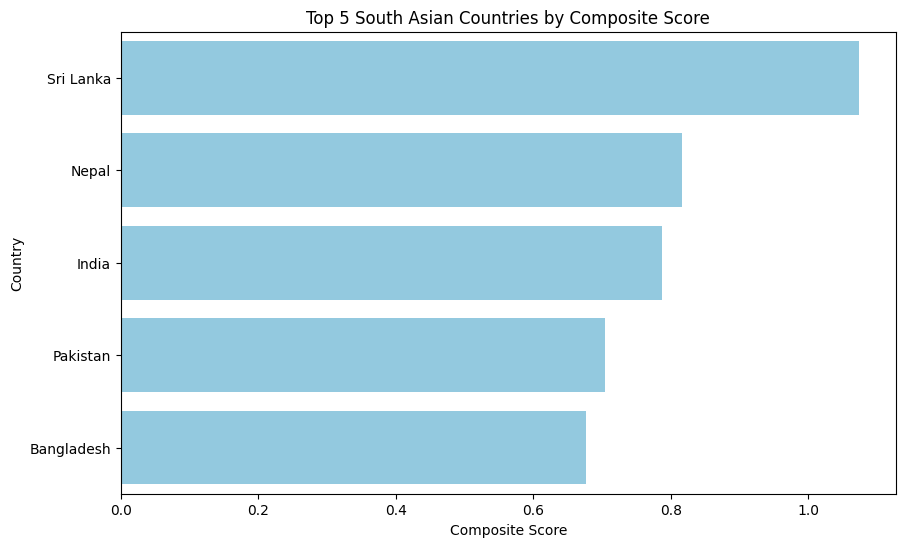

In [183]:
top_5_composite_score = south_asian_df.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_composite_score, color='skyblue')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()



4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

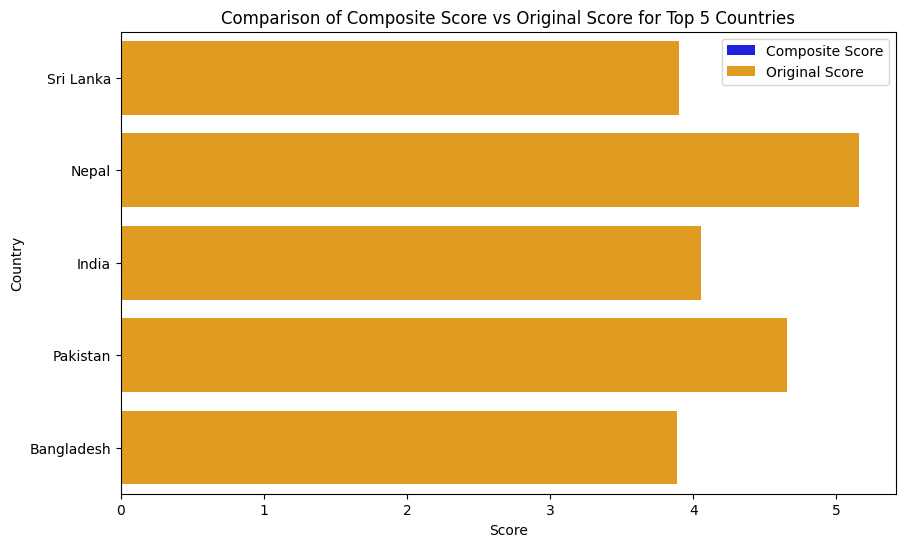

In [184]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_composite_score, color='blue', label='Composite Score')
sns.barplot(x='score', y='Country name', data=top_5_composite_score, color='orange', label='Original Score')
plt.title('Comparison of Composite Score vs Original Score for Top 5 Countries')
plt.xlabel('Score')
plt.ylabel('Country')
plt.legend()
plt.show()

Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.

In [185]:
def calculate_outlier_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

score_lower, score_upper = calculate_outlier_bounds(south_asian_df['score'])

gdp_lower, gdp_upper = calculate_outlier_bounds(south_asian_df['Log GDP per capita'])

south_asian_df['Outlier_Score'] = (south_asian_df['score'] < score_lower) | (south_asian_df['score'] > score_upper)
south_asian_df['Outlier_GDP'] = (south_asian_df['Log GDP per capita'] < gdp_lower) | (south_asian_df['Log GDP per capita'] > gdp_upper)
south_asian_df['Is_Outlier'] = south_asian_df['Outlier_Score'] | south_asian_df['Outlier_GDP']

outliers = south_asian_df[south_asian_df['Is_Outlier']]
print("Outlier Countries:")
print(outliers[['Country name', 'score', 'Log GDP per capita']])


Outlier Countries:
  Country name  score  Log GDP per capita
5  Afghanistan  1.721               0.628


3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.



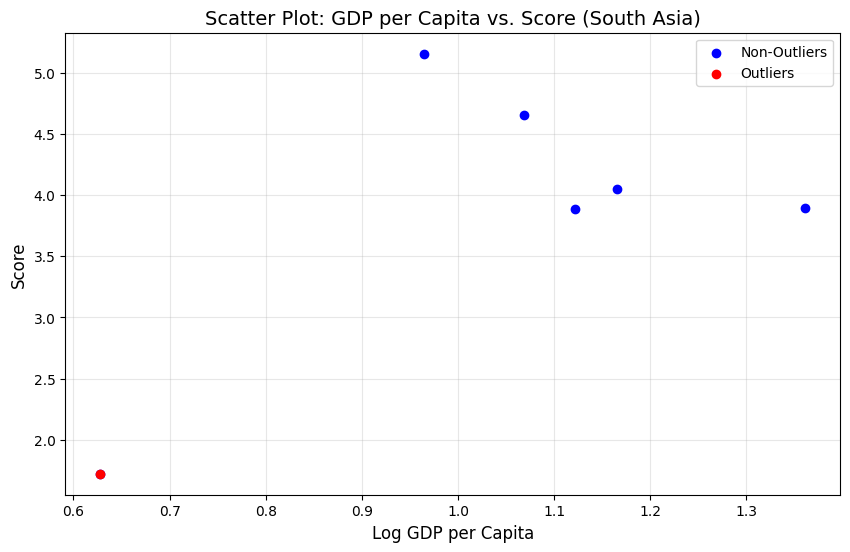

In [186]:
plt.figure(figsize=(10, 6))
plt.scatter(south_asian_df['Log GDP per capita'], south_asian_df['score'], label='Non-Outliers', color='blue')

plt.scatter(outliers['Log GDP per capita'], outliers['score'], label='Outliers', color='red')

plt.title('Scatter Plot: GDP per Capita vs. Score (South Asia)', fontsize=14)
plt.xlabel('Log GDP per Capita', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

4. Discuss the characteristics of these outliers and their potential impact on regional averages.

In [187]:
# These outlier are the extreme values that are present in the columns .These outliers have some effects on the mean but a less effect on the  median and the mode

Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [188]:
freedom_corr = south_asian_df['score'].corr(south_asian_df['Freedom to make life choices'])
generosity_corr = south_asian_df['score'].corr(south_asian_df['Generosity'])
print(f"Correlation between Score and Freedom to Make Life Choices: {freedom_corr}")
print(f"Correlation between Score and Generosity: {generosity_corr}")

Correlation between Score and Freedom to Make Life Choices: 0.8005185224163315
Correlation between Score and Generosity: 0.874512371253192


2. Create scatter plots with trendlines for these metrics against the Score.

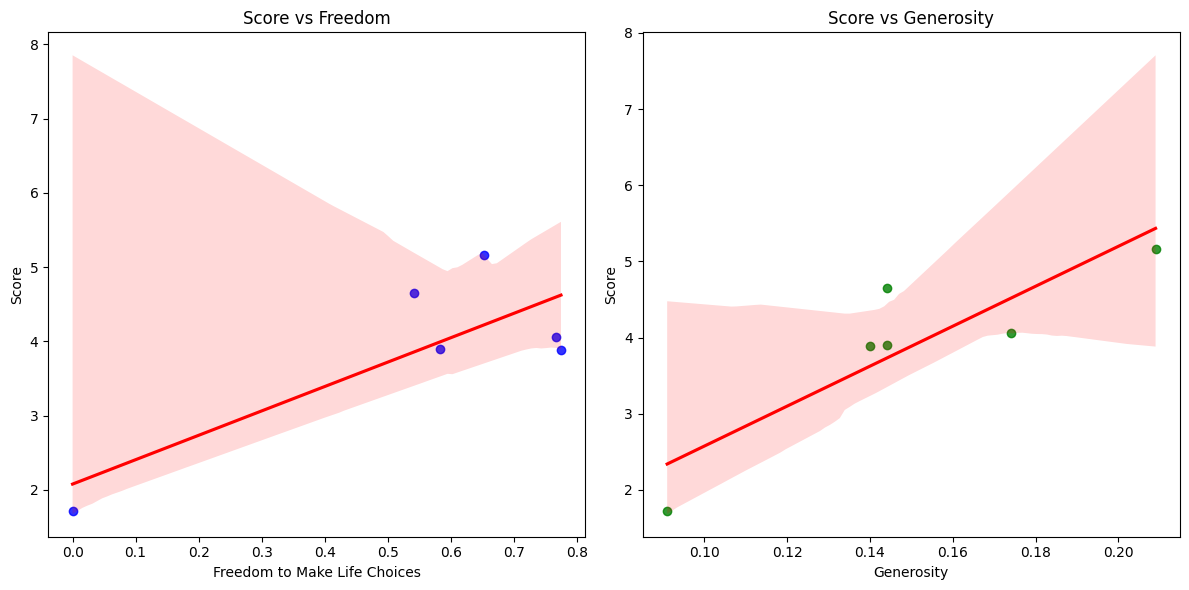

In [189]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=south_asian_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Score vs Freedom')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

# Plot 2: Score vs Generosity
plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=south_asian_df, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

### The highest the pearsons coefficients between these metrices the strongest the relationship is and the lowest the pearsons coefficient the weakest the relationship.Since the pearsons coefficients lies between the values of -1 to 1 higher the coefficient the stronger the relationship

Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [190]:
south_asian_df['GDP-Score Gap'] = south_asian_df['Log GDP per capita'] - south_asian_df['score']

2. Rank the South Asian countries by this gap in both ascending and descending order.

In [191]:
ascending_gap = south_asian_df[['Country name', 'GDP-Score Gap']].sort_values(by='GDP-Score Gap', ascending=True)
descending_gap = south_asian_df[['Country name', 'GDP-Score Gap']].sort_values(by='GDP-Score Gap', ascending=False)

3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

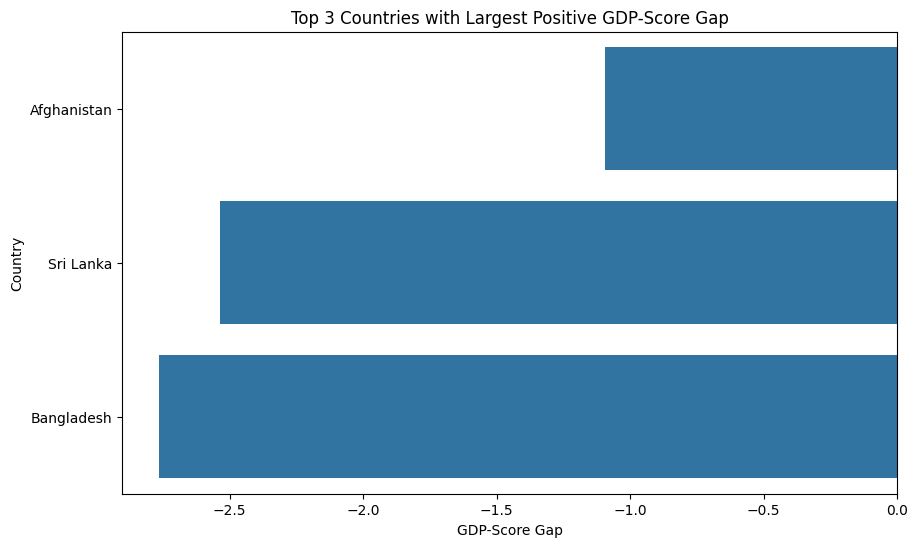

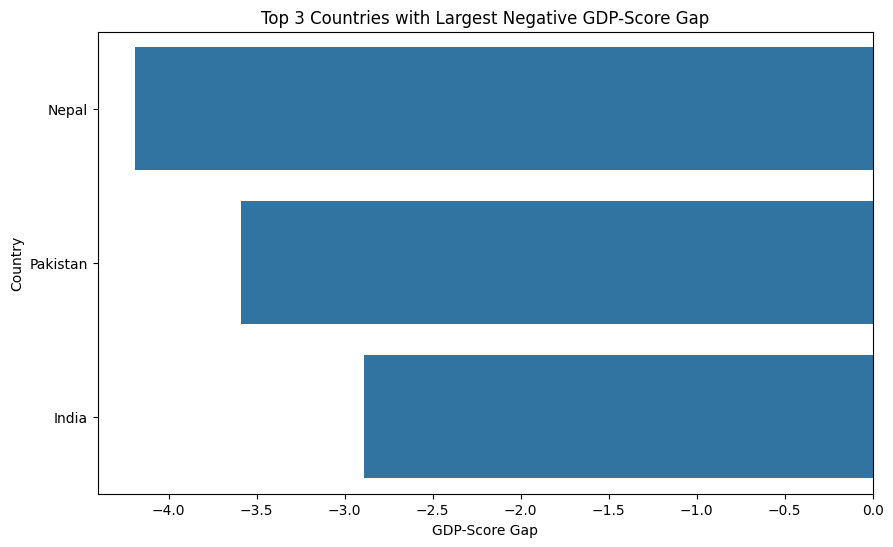

In [192]:
top_3_positive_gap = descending_gap.head(3)
top_3_negative_gap = ascending_gap.head(3)

plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_3_positive_gap)
plt.title('Top 3 Countries with Largest Positive GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_3_negative_gap)
plt.title('Top 3 Countries with Largest Negative GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()

4. Analyze the reasons behind these gaps and their implications for South Asian countries.

# The reasons behind the positive gaps is likely due to High GDP per capita in countries like Maldives Bhutan and the reasons behind the Negative gaps is relatively due to their low gdp.Positive gaps indicate underperformance in quality-of-life factors, while negative gaps show that even lower-income nations can achieve well-being with strong social policies.

3.3 Problem - 3 - Comparative Analysis:
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

In [193]:
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]
middle_east_df = df[df['Country name'].isin(middle_east_countries)]
middle_east_df.to_csv("/content/drive/MyDrive/Assignment 1/middle_east_countries.csv", index=False)
print(middle_east_df.head())

            Country name  score  Log GDP per capita  Social support  \
4                 Israel  7.341               1.803           1.513   
12                Kuwait  6.951               1.845           1.364   
21  United Arab Emirates  6.733               1.983           1.164   
27          Saudi Arabia  6.594               1.842           1.361   
61               Bahrain  5.959                 NaN             NaN   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
4                     0.740                         0.641       0.153   
12                    0.661                         0.827       0.200   
21                    0.563                         0.815       0.209   
27                    0.511                         0.787       0.114   
61                      NaN                           NaN         NaN   

    Perceptions of corruption  Dystopia + residual Happiness Category  
4                       0.193                2.298            

1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

In [194]:
south_asian_mean = south_asian_df['score'].mean()
south_asian_std = south_asian_df['score'].std()

middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()

print(f"South Asia - Mean: {south_asian_mean}, Standard Deviation: {south_asian_std}")
print(f"Middle East - Mean: {middle_east_mean}, Standard Deviation: {middle_east_std}")

South Asia - Mean: 3.895666666666667, Standard Deviation: 1.1770690152521501
Middle East - Mean: 5.412100000000001, Standard Deviation: 1.5662011684327144


• Which region has higher happiness Scores on average?

In [195]:
if south_asian_mean > middle_east_mean:
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")

Middle East has a higher average happiness score.


2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.

In [196]:
south_asian_top_3 = south_asian_df[['Country name', 'score']].sort_values(by='score', ascending=False).head(3)
south_asian_bottom_3 = south_asian_df[['Country name', 'score']].sort_values(by='score').head(3)

middle_east_top_3 = middle_east_df[['Country name', 'score']].sort_values(by='score', ascending=False).head(3)
middle_east_bottom_3 = middle_east_df[['Country name', 'score']].sort_values(by='score').head(3)

• Plot bar charts comparing these charts.

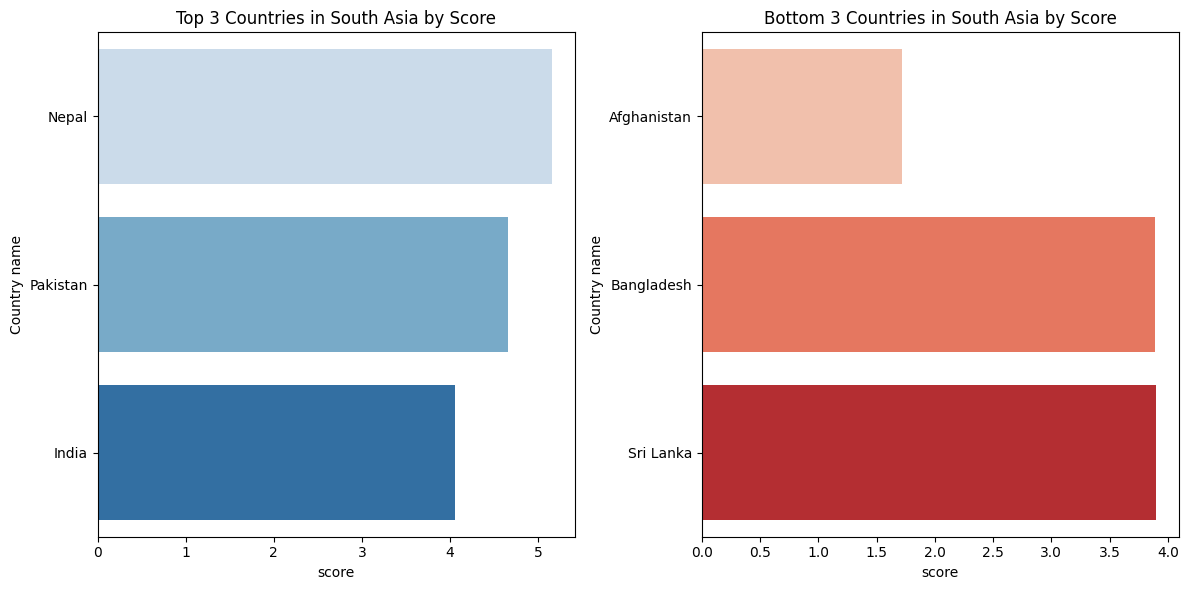

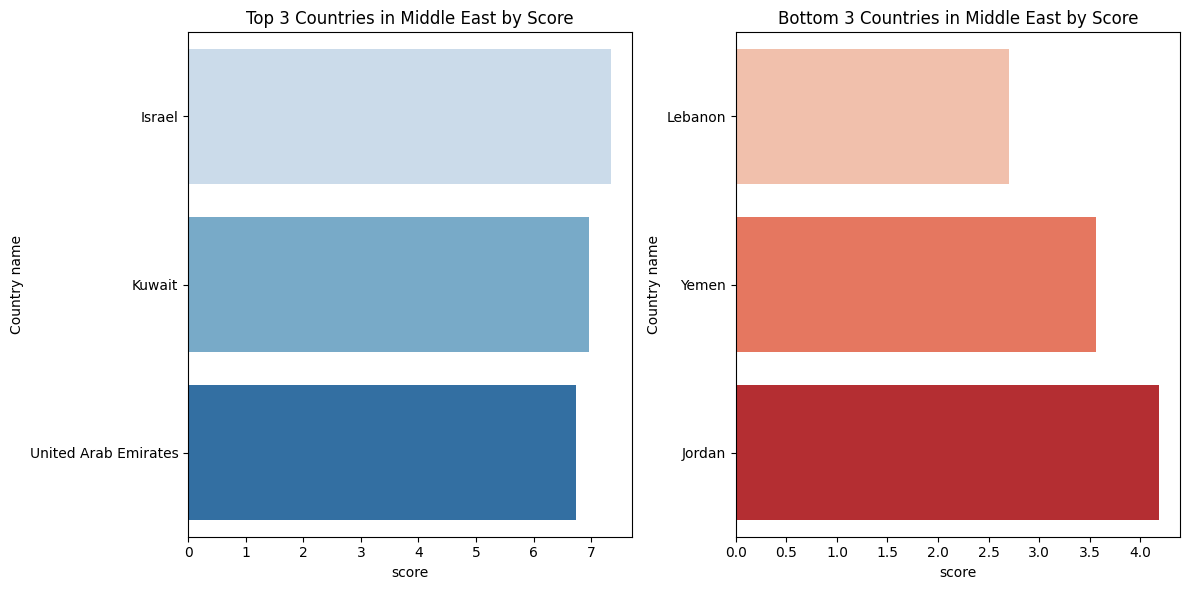

In [197]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=south_asian_top_3, hue='Country name', palette='Blues', legend=False)
plt.title('Top 3 Countries in South Asia by Score')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=south_asian_bottom_3, hue='Country name', palette='Reds', legend=False)
plt.title('Bottom 3 Countries in South Asia by Score')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=middle_east_top_3, hue='Country name', palette='Blues', legend=False)
plt.title('Top 3 Countries in Middle East by Score')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=middle_east_bottom_3, hue='Country name', palette='Reds', legend=False)
plt.title('Bottom 3 Countries in Middle East by Score')

plt.tight_layout()
plt.show()

3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?

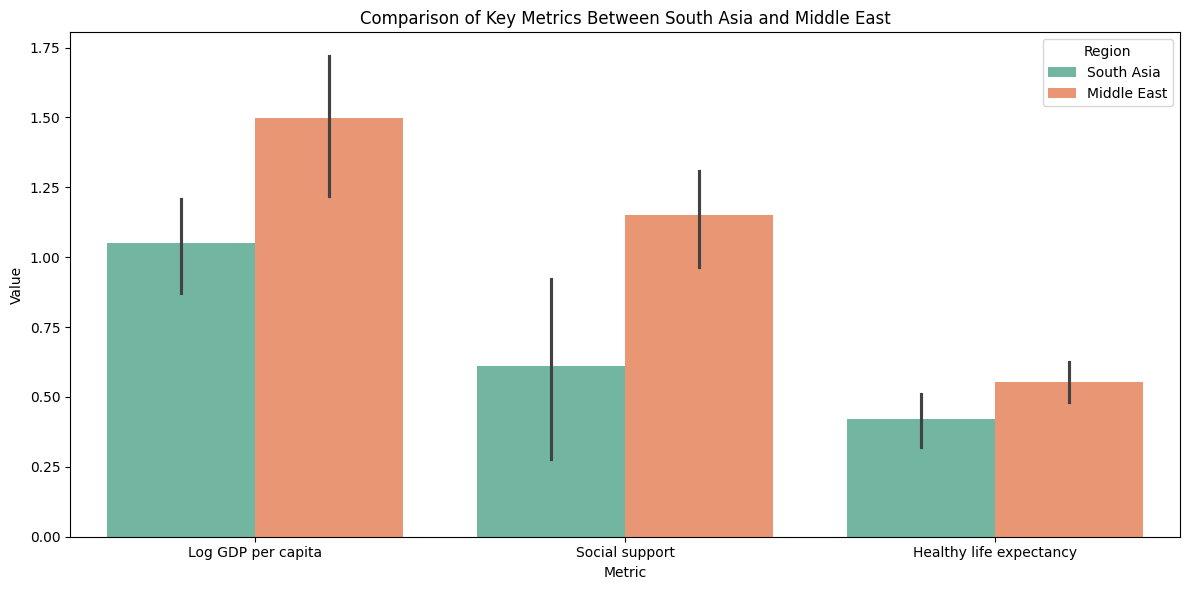

In [198]:
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

south_asia_metrics = south_asian_df[['Country name'] + metrics].melt(id_vars='Country name', value_vars=metrics, var_name='Metric', value_name='Value')
middle_east_metrics = middle_east_df[['Country name'] + metrics].melt(id_vars='Country name', value_vars=metrics, var_name='Metric', value_name='Value')

south_asia_metrics['Region'] = 'South Asia'
middle_east_metrics['Region'] = 'Middle East'

comparison_df = pd.concat([south_asia_metrics, middle_east_metrics]).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Value', hue='Region', data=comparison_df, palette='Set2')

plt.title('Comparison of Key Metrics Between South Asia and Middle East')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

4. Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?

In [199]:
south_asia_score_range = south_asian_df['score'].max() - south_asian_df['score'].min()
middle_east_score_range = middle_east_df['score'].max() - middle_east_df['score'].min()

south_asia_cv = south_asian_df['score'].std() / south_asian_df['score'].mean()
middle_east_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()

print(f"South Asia Score Range: {south_asia_score_range}")
print(f"Middle East Score Range: {middle_east_score_range}")
print(f"South Asia Coefficient of Variation (CV): {south_asia_cv}")
print(f"Middle East Coefficient of Variation (CV): {middle_east_cv}")

South Asia Score Range: 3.4370000000000003
Middle East Score Range: 4.634
South Asia Coefficient of Variation (CV): 0.30214828833374263
Middle East Coefficient of Variation (CV): 0.28938880812119405


5. Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.

South Asia Correlation Matrix:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.800519   
Freedom to make life choices  0.800519                      1.000000   
Generosity                    0.874512                      0.733396   

                              Generosity  
score                           0.874512  
Freedom to make life choices    0.733396  
Generosity                      1.000000  

Middle East Correlation Matrix:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity                      1.000000  


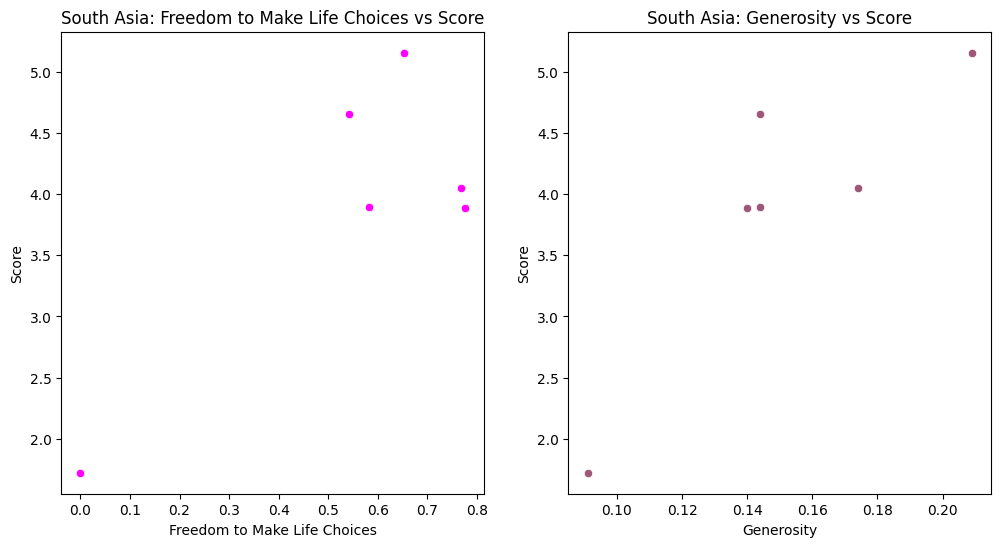

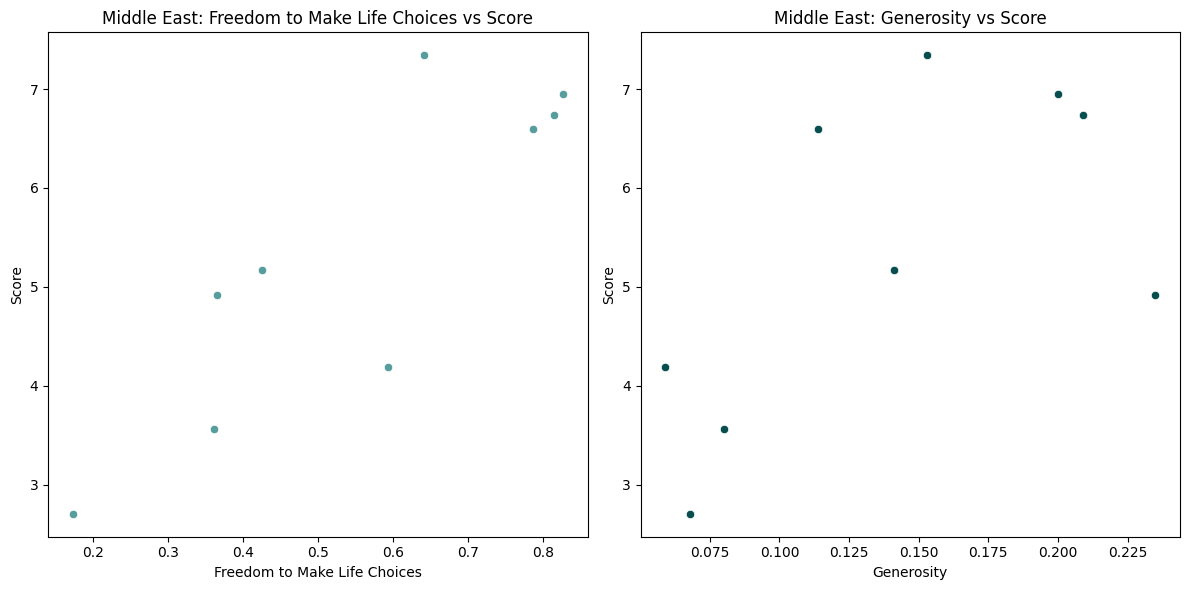

In [200]:
south_asia_corr = south_asian_df[['score', 'Freedom to make life choices', 'Generosity']].corr()
middle_east_corr = middle_east_df[['score', 'Freedom to make life choices', 'Generosity']].corr()

print("South Asia Correlation Matrix:")
print(south_asia_corr)
print("\nMiddle East Correlation Matrix:")
print(middle_east_corr)

# • Create scatter plots to visualize and interpret the relationships.
plt.figure(figsize=(12, 6))

# South Asia
plt.subplot(1, 2, 1)
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asian_df, color='#FF00FF') # Color changed to red
plt.title('South Asia: Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Generosity', y='score', data=south_asian_df, color='#9e5776') # Color changed to red
plt.title('South Asia: Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')

# Middle East
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Freedom to make life choices', y='score', data=middle_east_df, color='#579d9e')
plt.title('Middle East: Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Generosity', y='score', data=middle_east_df,color='#084e4f')
plt.title('Middle East: Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

6. Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita.
• Plot these outliers and discuss their implications.

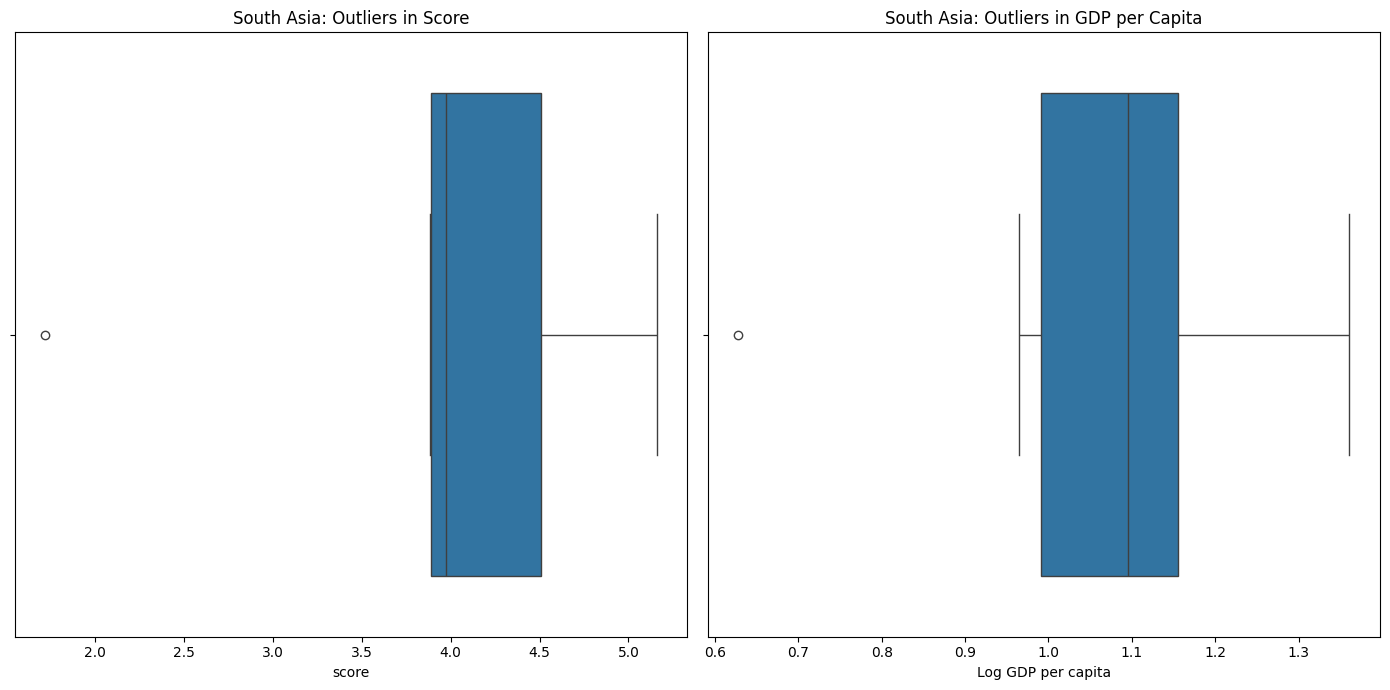

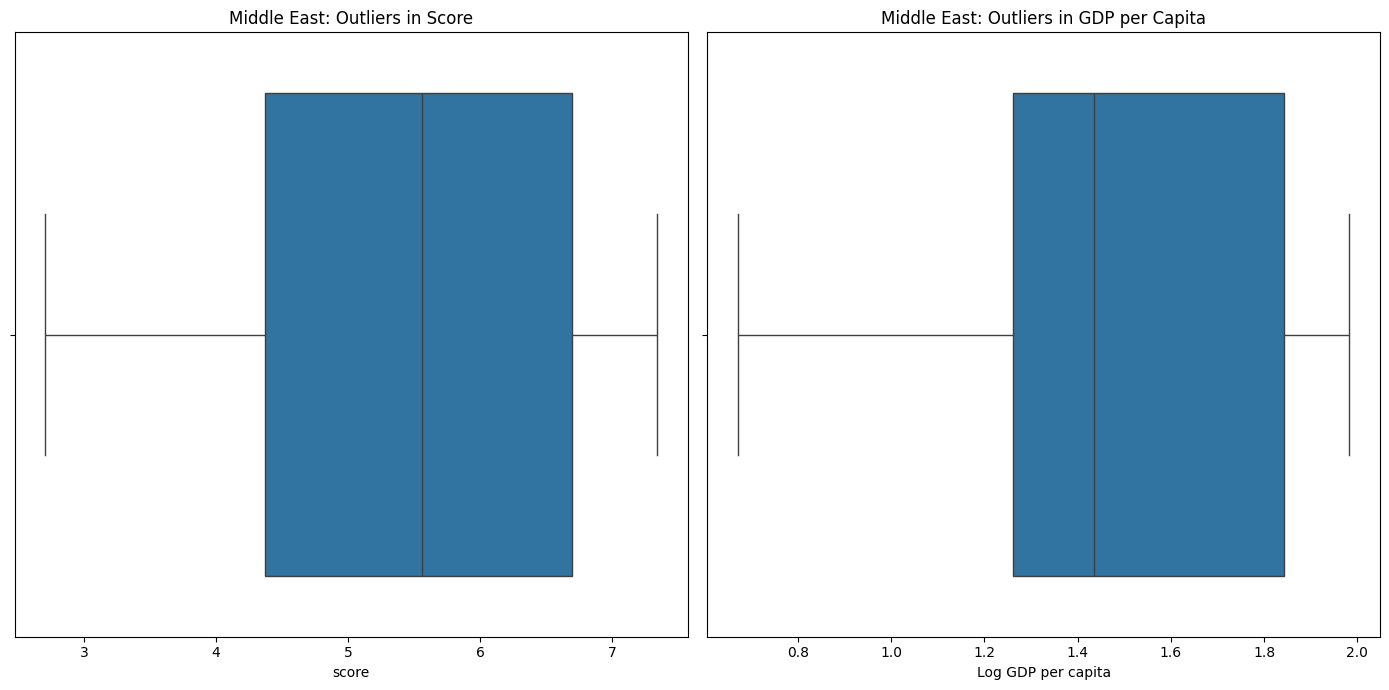

,Country name,Log GDP per capita


In [201]:
# • Identify outlier countries in both regions based on Score and GDP per Capita.
south_asia_outliers_score = south_asian_df[(south_asian_df['score'] < south_asian_df['score'].quantile(0.25) - 1.5 * (south_asian_df['score'].quantile(0.75) - south_asian_df['score'].quantile(0.25))) |
                                            (south_asian_df['score'] > south_asian_df['score'].quantile(0.75) + 1.5 * (south_asian_df['score'].quantile(0.75) - south_asian_df['score'].quantile(0.25)))]

south_asia_outliers_gdp = south_asian_df[(south_asian_df['Log GDP per capita'] < south_asian_df['Log GDP per capita'].quantile(0.25) - 1.5 * (south_asian_df['Log GDP per capita'].quantile(0.75) - south_asian_df['Log GDP per capita'].quantile(0.25))) |
                                           (south_asian_df['Log GDP per capita'] > south_asian_df['Log GDP per capita'].quantile(0.75) + 1.5 * (south_asian_df['Log GDP per capita'].quantile(0.75) - south_asian_df['Log GDP per capita'].quantile(0.25)))]

middle_east_outliers_score = middle_east_df[(middle_east_df['score'] < middle_east_df['score'].quantile(0.25) - 1.5 * (middle_east_df['score'].quantile(0.75) - middle_east_df['score'].quantile(0.25))) |
                                             (middle_east_df['score'] > middle_east_df['score'].quantile(0.75) + 1.5 * (middle_east_df['score'].quantile(0.75) - middle_east_df['score'].quantile(0.25)))]

middle_east_outliers_gdp = middle_east_df[(middle_east_df['Log GDP per capita'] < middle_east_df['Log GDP per capita'].quantile(0.25) - 1.5 * (middle_east_df['Log GDP per capita'].quantile(0.75) - middle_east_df['Log GDP per capita'].quantile(0.25))) |
                                            (middle_east_df['Log GDP per capita'] > middle_east_df['Log GDP per capita'].quantile(0.75) + 1.5 * (middle_east_df['Log GDP per capita'].quantile(0.75) - middle_east_df['Log GDP per capita'].quantile(0.25)))]

# • Plot these outliers and discuss their implications.
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x=south_asian_df['score'])
plt.title('South Asia: Outliers in Score')

plt.subplot(1, 2, 2)
sns.boxplot(x=south_asian_df['Log GDP per capita'])
plt.title('South Asia: Outliers in GDP per Capita')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x=middle_east_df['score'])
plt.title('Middle East: Outliers in Score')

plt.subplot(1, 2, 2)
sns.boxplot(x=middle_east_df['Log GDP per capita'])
plt.title('Middle East: Outliers in GDP per Capita')

plt.tight_layout()
plt.show()

south_asia_outliers_score[['Country name', 'score']]
south_asia_outliers_gdp[['Country name', 'Log GDP per capita']]
middle_east_outliers_score[['Country name', 'score']]
middle_east_outliers_gdp[['Country name', 'Log GDP per capita']]

7. Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.
• Interpret the key differences in distribution shapes, medians, and outliers.

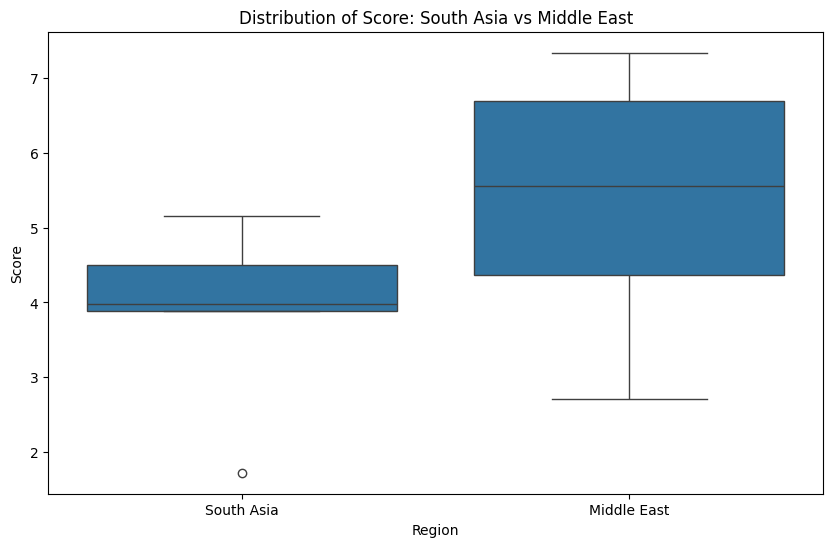

In [202]:
# • Create boxplots comparing the distribution of Score between South Asia and the Middle East.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([south_asian_df.assign(Region='South Asia'), middle_east_df.assign(Region='Middle East')]))
plt.title('Distribution of Score: South Asia vs Middle East')
plt.xlabel('Region')
plt.ylabel('Score')
plt.show()
